<a href="https://colab.research.google.com/github/daquarti/AI/blob/main/Deploy_PrototypingTFServingForSequenceClassification_Hugging_Face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers
!pip install requests

     |████████████████████████████████| 1.3MB 14.4MB/s 
     |████████████████████████████████| 1.1MB 48.4MB/s 
     |████████████████████████████████| 890kB 48.5MB/s 
     |████████████████████████████████| 2.9MB 46.0MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893257 sha256=3bd605f4fd52066ddfc4aed937d778ebefcfa5bdc9dffced8bf3a6d410459c19
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.menos de 48hs de evolución
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/My Drive/Emergencias/Consultas/"

In [ ]:
PRETRAINED_MODEL = path + "destil_v4"

In [ ]:
saved_model_path = "./tfx_saved_model/distilbert-sst2-english/3"

In [ ]:
saved_model_path

'./tfx_saved_model/distilbert-sst2-english/3'

In [ ]:
import tensorflow as tf
from transformers import *

class WrappedModel(tf.Module):
	def __init__(self):
		super(WrappedModel, self).__init__()
		config = AutoConfig.from_pretrained(PRETRAINED_MODEL)
		self.model = TFAutoModelForSequenceClassification.from_pretrained(PRETRAINED_MODEL, config=config)
	@tf.function
	def __call__(self, x):
		return self.model(x)

model = WrappedModel()

# call = model.__call__.get_concrete_function(tf.TensorSpec([None, None], tf.int32, name='input_ids'))
call = model.__call__.get_concrete_function((tf.TensorSpec([None, None], tf.int32, 
                                                          name='input_ids'), tf.TensorSpec([None, None], tf.int32, name='attention_mask')))
tf.saved_model.save(model, saved_model_path, signatures=call, )

All model checkpoint layers were used when initializing TFDistilBertForSequenceClassification.

All the layers of TFDistilBertForSequenceClassification were initialized from the model checkpoint at /content/drive/My Drive/Emergencias/Consultas/destil_v4.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ./tfx_saved_model/distilbert-sst2-english/3/assets


In [ ]:
!saved_model_cli show --dir ./tfx_saved_model/distilbert-sst2-english/3 --tag_set serve --signature_def serving_default

The given SavedModel SignatureDef contains the following input(s):
  inputs['attention_mask'] tensor_info:
      dtype: DT_INT32
      shape: (-1, -1)
      name: serving_default_attention_mask:0
  inputs['input_ids'] tensor_info:
      dtype: DT_INT32
      shape: (-1, -1)
      name: serving_default_input_ids:0
The given SavedModel SignatureDef contains the following output(s):
  outputs['output_0'] tensor_info:
      dtype: DT_FLOAT
      shape: (-1, 95)
      name: StatefulPartitionedCall:0
Method name is: tensorflow/serving/predict


In [ ]:
!saved_model_cli show --dir ./tfx_saved_model/distilbert-sst2-english/3 --all


MetaGraphDef with tag-set: 'serve' contains the following SignatureDefs:

signature_def['__saved_model_init_op']:
  The given SavedModel SignatureDef contains the following input(s):
  The given SavedModel SignatureDef contains the following output(s):
    outputs['__saved_model_init_op'] tensor_info:
        dtype: DT_INVALID
        shape: unknown_rank
        name: NoOp
  Method name is: 

signature_def['serving_default']:
  The given SavedModel SignatureDef contains the following input(s):
    inputs['attention_mask'] tensor_info:
        dtype: DT_INT32
        shape: (-1, -1)
        name: serving_default_attention_mask:0
    inputs['input_ids'] tensor_info:
        dtype: DT_INT32
        shape: (-1, -1)
        name: serving_default_input_ids:0
  The given SavedModel SignatureDef contains the following output(s):
    outputs['output_0'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 95)
        name: StatefulPartitionedCall:0
  Method name is: tensorflow/serving/pred

In [ ]:
!echo "deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | tee /etc/apt/sources.list.d/tensorflow-serving.list && \
curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | apt-key add -
!apt update

deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2943  100  2943    0     0   6511      0 --:--:-- --:--:-- --:--:--  6511
OK
Get:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic/main Sources [1,688 kB]
Get:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic/

In [ ]:
!apt-get install tensorflow-model-server

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  tensorflow-model-server
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 210 MB of archives.
After this operation, 0 B of additional disk space will be used.
Get:1 http://storage.googleapis.com/tensorflow-serving-apt stable/tensorflow-model-server amd64 tensorflow-model-server all 2.3.0 [210 MB]
Fetched 210 MB in 4s (49.5 MB/s)
Selecting previously unselected package tensorflow-model-server.
(Reading database ... 144786 files and directories currently installed.)
Preparing to unpack .../tensorflow-model-server_2.3.0_all.deb ...
Unpacking tensorflow-model-server (2.3.0) ...
Setting up tensorflow-model-server (2.3.0) ...


In [ ]:
%%bash --bg 
nohup tensorflow_model_server \
  --rest_api_port=8501 \
  --model_name=sentiment_analysis_distilbert_sst2 \
  --model_base_path="/content/tfx_saved_model/distilbert-sst2-english"  >server.log 2>&1

Starting job # 0 in a separate thread.


In [ ]:
!tail server.log

2020-11-13 15:25:00.137611: I tensorflow_serving/model_servers/server.cc:87] Building single TensorFlow model file config:  model_name: sentiment_analysis_distilbert_sst2 model_base_path: /content/tfx_saved_model/distilbert-sst2-english
2020-11-13 15:25:00.137942: I tensorflow_serving/model_servers/server_core.cc:464] Adding/updating models.
2020-11-13 15:25:00.137982: I tensorflow_serving/model_servers/server_core.cc:575]  (Re-)adding model: sentiment_analysis_distilbert_sst2
2020-11-13 15:25:00.139597: I tensorflow_serving/core/basic_manager.cc:739] Successfully reserved resources to load servable {name: sentiment_analysis_distilbert_sst2 version: 3}
2020-11-13 15:25:00.139629: I tensorflow_serving/core/loader_harness.cc:66] Approving load for servable version {name: sentiment_analysis_distilbert_sst2 version: 3}
2020-11-13 15:25:00.139644: I tensorflow_serving/core/loader_harness.cc:74] Loading servable version {name: sentiment_analysis_distilbert_sst2 version: 3}
2020-11-13 15:25:0

In [ ]:
post_request_distilbert = "http://localhost:8501/v1/models/sentiment_analysis_distilbert_sst2:predict"

In [ ]:
import json
import numpy
import numpy as np
import requests

tokenizer = AutoTokenizer.from_pretrained('distilbert-base-multilingual-cased')
my_features = {"input_ids": tokenizer.encode("A man inspects the uniform of a figure in some East Asian country.", add_special_tokens=True)}

In [ ]:
my_features

{'input_ids': [101,
  138,
  10817,
  15498,
  92385,
  10105,
  51135,
  10108,
  169,
  17527,
  10106,
  11152,
  11830,
  16900,
  12723,
  119,
  102]}

In [ ]:
import json
import numpy as np
import requests

sentences = [
             "this is absolutely great",
             "this is bad"
]

my_features = [{"input_ids": tokenizer.encode(sentence, add_special_tokens=True)} for sentence in sentences]
print(my_features)

data = json.dumps({"signature_name": "serving_default",
                   "instances": my_features})
headers = {"content-type": "application/json"}
json_response = requests.post(post_request_distilbert,
                              data=data, headers=headers)
print(json_response)
predictions = numpy.array(json.loads(json_response.text)["predictions"])
print(predictions)
for prediction in predictions:
  np.argmax(prediction)

[{'input_ids': [101, 10531, 10124, 48573, 10454, 14772, 102]}, {'input_ids': [101, 10531, 10124, 15838, 102]}]
<Response [400]>


KeyError: ignored

In [ ]:
import json
import numpy as np
import requests

sentences = [
             "this is absolutely great"
]

my_features = [{"input_ids": tokenizer.encode(sentence, add_special_tokens=True)} for sentence in sentences]
print(my_features)

features = [{'input_ids': [101, 2023, 2003, 7078, 2307, 102]}]

data = json.dumps({"signature_name": "serving_default",
                   "instances": features})
headers = {"content-type": "application/json"}
json_response = requests.post(post_request_distilbert,
                              data=data, headers=headers)
print(json_response)
predictions = numpy.array(json.loads(json_response.text)["predictions"])
print(predictions)
for prediction in predictions:
  np.argmax(prediction)

[{'input_ids': [101, 10531, 10124, 48573, 10454, 14772, 102]}]
<Response [400]>


KeyError: ignored

In [ ]:
sentences = [
             "ME FALTA EL AIRE, PACIENTE CON DISNEA"
]

examples = ({'idx': tf.constant(i, dtype=tf.int64), 'label': tf.constant(0, dtype=tf.int64) ,
           'sentence': tf.constant(sentence, dtype=tf.string)} for i, sentence in enumerate(sentences))

def gen():
  for i, sentence in enumerate(sentences):
    yield(
        {'idx': tf.constant(i, dtype=tf.int64), 'label': tf.constant(0, dtype=tf.int64) ,
           'sentence': tf.constant(sentence, dtype=tf.string)}
    )
ds = tf.data.Dataset.from_generator(gen, 
                                    ({"sentence": tf.string, "idx": tf.int64, "label": tf.int64})
                                    )

feature_ds = glue_convert_examples_to_features(ds, tokenizer, max_length=512, task='sst-2')
feature_dataset = feature_ds.batch(1)

instances = [{"input_ids": feature_batch[0]["input_ids"].numpy().tolist()[0], 
              "attention_mask": feature_batch[0]["attention_mask"].numpy().tolist()[0]} for feature_batch in feature_dataset.take(-1)]
print(instances)

data = json.dumps({"signature_name": "serving_default",
                   "instances": instances})
headers = {"content-type": "application/json"}
json_response = requests.post(post_request_distilbert,
                              data=data, headers=headers)
print(json_response)
predictions = numpy.array(json.loads(json_response.text)["predictions"])
print(predictions[0])

/usr/local/lib/python3.6/dist-packages/transformers/data/processors/glue.py:67: FutureWarning: This function will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/master/examples/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("function"), FutureWarning)
/usr/local/lib/python3.6/dist-packages/transformers/data/processors/glue.py:331: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/master/examples/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning)


[{'input_ids': [101, 47430, 20794, 11369, 24951, 69765, 62405, 66014, 117, 32349, 89955, 50655, 29833, 32992, 11537, 110014, 10731, 93280, 10738, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
predictions[0]

array([ -2.55397081,  -3.18239212,  -4.75505877,  -6.59895134,
        -4.76441526,  -5.23084879,  -2.99487948,  -7.11187553,
        -4.51290894,  -6.90330839,  -7.1703229 ,  -7.1558218 ,
        -7.68981886,  -8.61352444,  -4.40295887,  -3.05367303,
        -4.63271713,  -6.74978971,  -6.52086496,  -5.13131285,
        -4.59616184,  -6.02656746,  -5.97824764,  -4.20966482,
        -6.81862545,  -4.79810333,  -4.17531586,  -5.18068409,
        -6.08380604,  -6.3885808 ,  -5.98675919,  -8.48075104,
        -6.05541325,  -6.29614592,  -6.02168608,  -5.84647083,
        -7.98293686,  -7.77712107,  -1.65307271,  -2.80198979,
        -2.78329253,  -2.90671468,  -3.94931221,  -6.03894806,
        -3.7839129 ,  -3.86831164,  -5.69506025,  -2.54837656,
        -3.291013  ,  -1.3386209 ,  -6.78012371,  -3.95326734,
        -4.6524272 ,  -3.85650659,  -4.61655188,  -5.7463336 ,
        -5.94203663,  -2.93723202,  -3.8484695 ,  -3.64145494,
        -3.00235319,  -6.63813543,  -3.91659665,  -5.32

In [ ]:
tf_prediction = tf.nn.softmax(predictions, axis=1).numpy()[0]
print(tf_prediction)

[4.15969869e-03 2.21892164e-03 4.60406577e-04 7.28365137e-05
 4.56118877e-04 2.86093861e-04 2.67656424e-03 4.36102930e-05
 5.86551100e-04 5.37240275e-05 4.11344443e-05 4.17352849e-05
 2.44676019e-05 9.71473972e-06 6.54721439e-04 2.52373620e-03
 5.20323951e-04 6.26384321e-05 7.87520076e-05 3.16035921e-04
 5.39696471e-04 1.29101804e-04 1.35493151e-04 7.94333907e-04
 5.84717237e-05 4.41009052e-04 8.22092460e-04 3.00811746e-04
 1.21919707e-04 8.98901106e-05 1.34344788e-04 1.10941472e-05
 1.25430959e-04 9.85952229e-05 1.29733540e-04 1.54577857e-04
 1.82512190e-05 2.24221130e-05 1.02404006e-02 3.24600063e-03
 3.30726288e-03 2.92325807e-03 1.03055886e-03 1.27513300e-04
 1.21591947e-03 1.11750868e-03 1.79847358e-04 4.18303430e-03
 1.99052904e-03 1.40243142e-02 6.07668871e-05 1.02649092e-03
 5.10168739e-04 1.13077910e-03 5.28803470e-04 1.70858398e-04
 1.40489408e-04 2.83539550e-03 1.13990389e-03 1.40208233e-03
 2.65663494e-03 7.00376743e-05 1.06483175e-03 2.60529188e-04
 2.66426421e-04 2.975306

In [ ]:
import numpy as np
le.inverse_transform([np.argmax(tf_prediction)])

array(['RESP   Fatiga respiratoria disnea   (337)'], dtype='<U93')

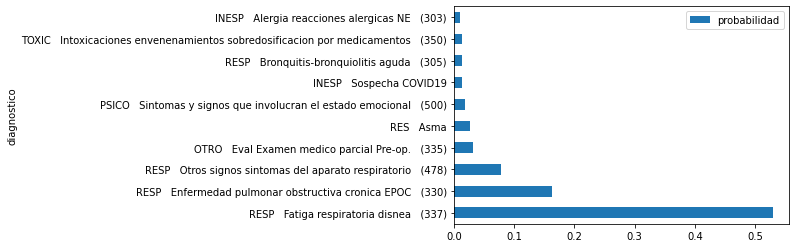

In [ ]:
array_invertido = np.argsort(tf_prediction)[::-1]
diagnosticos = le.inverse_transform(array_invertido)
probabilidad = np.sort (tf_prediction)[::-1]
list_of_tuples = list(zip(diagnosticos, probabilidad))[:10]
df = pd.DataFrame(list_of_tuples, columns = ['diagnostico', 'probabilidad']) 
df.head(10).plot.barh(x='diagnostico')

In [ ]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)
df = pd.read_csv (path + 'input_distil_v1')
df.info()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99329 entries, 0 to 99328
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   resumen      99329 non-null  object
 1   diagnostico  99329 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99329 entries, 0 to 99328
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   resumen      99329 non-null  object
 1   diagnostico  99329 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


In [ ]:
y = df.diagnostico.to_list()
X = df.resumen.to_list()

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y)

y_encoder = le.transform(y)
#len(y_encoder)
#len(le.classes_)
y = le.transform(y)
